## Import libraries and packages

Following good practice, it is highly recommended to create a new environment for the development of this  project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
import inspect
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
import pickle

In [2]:
from sklearn import datasets, linear_model

## Reading CSV  with pandas

In [3]:
scl_flt = pd.read_csv("dataset_SCL.csv")

C:\Users\sebas\AppData\Local\Temp\ipykernel_14548\2756499070.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  scl_flt = pd.read_csv("dataset_SCL.csv")


In [4]:
scl_flt.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


# Analysis of categorical variables

In [5]:
scl_flt[["Vlo-I","Vlo-O","Ori-I","Ori-O","Des-I","Des-O","SIGLAORI","SIGLADES","Emp-I","Emp-O","OPERA","TIPOVUELO","DIANOM"]].describe()

,Vlo-I,Vlo-O,Ori-I,Ori-O,Des-I,Des-O,SIGLAORI,SIGLADES,Emp-I,Emp-O,OPERA,TIPOVUELO,DIANOM
count,68206,68205,68206,68206,68206,68206,68206,68206,68206,68206,68206,68206,68206
unique,750,866,1,1,64,63,1,62,30,32,23,2,7
top,174,174,SCEL,SCEL,SCFA,SCFA,Santiago,Buenos Aires,LAN,LAN,Grupo LATAM,N,Viernes
freq,686,649,68206,68206,5787,5786,68206,6335,37611,20988,40892,36966,10292


In [6]:
print("FECHA-I")
print(scl_flt["Fecha-I"].max())
print(scl_flt["Fecha-I"].min())
print("FECHA-O")
print(scl_flt["Fecha-O"].max())
print(scl_flt["Fecha-O"].min())

FECHA-I
2017-12-31 23:55:00
2017-01-01 00:15:00
FECHA-O
2018-01-01 00:12:00
2017-01-01 00:04:00


As we can see, variables such as the number of flight ```Vlo-I``` ,```Vlo-O```, have different values in the description. The flight number has more unique values on the actual operated flights and the top value is the flight **174** on both variables.

Something similar is happening with the variables related with the destination ```Des-I``` ,```Des-O```, in which the number of unique values of the operated destination is less than the schedule values, in this case the most frequent destination is **SCFA** that correspond to the airport of Antofagasta in Chile (ICAO airport code), base on this we want to check the type of flight with the variable ```TIPOVUELO``` and we can check that the 54% of the flight are national flights.

Another interesting and disruptive thing that we can notice is that the variable ```SIGLADES``` that is the name of the city of destination does not correspond with the ICAO code airport of the variable ```Des-O``` or ```Des-I```, and as I said before the most common destination is Antofagasta, but in this case Buenos Aires in Argentina is the most frequent city of destination, so we need to check why this is happening with this variable.


With the code of the airline ```Emp-I``` ```Emp-O``` and the name ```OPERA``` we can notice that there are less names of airlines that codes, this because the airline can operate with different codes, and we can check in the next cells. Grupo LATAM with the callsign of LAN have the most frequent operation in SCEL.

Finally the data is composed of 68206 records. with dates from january of 2017 to december of 2017 and as is expected the column of the operated have the max data the first of January


## Cleaning and anlysis

### Flight Number

First we need to check if there is any NA value on the dataframe in order to replace it or drop the row. But we only see just one NA in the ```VLO-O```.

In [7]:
scl_flt.isna().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

We need to transform the column of ```VLO-O``` and delete a ".0" in order to clean the column and check why there is a big difference between these two variables.
After delete the sufix, we still have some differences, and we can change the type of the two variables for a string and save it as two new variables ```VLO-Ini``` ```VLO-Ope```

In [8]:
scl_flt[scl_flt.apply(lambda x: x['Vlo-I'] != x['Vlo-O'], axis = 1)][["Vlo-I","Vlo-O"]].value_counts().head(10)

Vlo-I  Vlo-O
170    170.0    43
168    168.0    43
164    164.0    42
162    162.0    41
150    150.0    40
174    174.0    37
156    156.0    36
172    172.0    32
166    166.0    32
231    231.0    31
dtype: int64

In [9]:
scl_flt["Vlo-Ope"]=scl_flt.apply(lambda x: str(x['Vlo-O']).replace(".0",""), axis = 1)

In [10]:
scl_flt[scl_flt.apply(lambda x: x['Vlo-I'] != x['Vlo-Ope'], axis = 1)][["Vlo-I","Vlo-Ope"]].describe()

,Vlo-I,Vlo-Ope
count,2789,2789
unique,237,240
top,281,281
freq,54,54


In [11]:
scl_flt["Vlo-Ini"]=scl_flt["Vlo-I"].astype(str)

In [12]:
scl_flt[scl_flt.apply(lambda x: x['Vlo-I'] != x['Vlo-Ini'], axis = 1)][["Vlo-I","Vlo-Ini"]].value_counts().head(5)

Vlo-I  Vlo-Ini
281    281        54
50     50         50
704    704        41
572    572        31
340    340        31
dtype: int64

Evidently in the next table, after the cleaning and the change of the type columns ```VLO-Ini``` ```VLO-Ope``` have now a similiar unique units. 

But at the end the differences are because they complete change the Number flight.

In [13]:
scl_flt[["Vlo-I","Vlo-Ini","Vlo-O","Vlo-Ope"]].describe()

,Vlo-I,Vlo-Ini,Vlo-O,Vlo-Ope
count,68206,68206,68205,68206
unique,750,584,866,609
top,174,174,174,174
freq,686,686,649,686


In [14]:
scl_flt[scl_flt.apply(lambda x: x['Vlo-Ini'] != x['Vlo-Ope'], axis = 1)][["Des-I","Des-O","Vlo-Ini","Vlo-Ope"]].value_counts()

Des-I  Des-O  Vlo-Ini  Vlo-Ope
SAEZ   SAEZ   4501     1001       19
              4503     1003       11
                       1303        5
SPJC   SPJC   702      700         3
SAEZ   SAEZ   7811     1101        3
                                  ..
              7813     1071        1
KATL   KATL   146      9858        1
SCAT   SCAT   114      114R        1
SCDA   SCDA   110      33          1
SUMU   SUMU   989P     989         1
Length: 73, dtype: int64

### Destination

The flights can change the destination due to multiple reasons such as the weather or the conditions on the destination airport, and they use the alternate airport, that basically is an airport that is close to the original. 

In some cases the alternate airport is in another country because the destination airport is close to the borders,  we can check the country in the majority of the cases with the two first characters of the ICAO code, and following this logic 4 of the flights change countries. Actually only 2 arrive in Argentina and Brazil, when initially where schedule to go to Ecuador and Argentina correspondly. The other two cases correspond to Australia and USA where ICAO code does not correspond with the first logic that I established.


In [15]:
scl_flt[scl_flt.apply(lambda x: x['Des-I'] != x['Des-O'], axis = 1)][["Des-I","Des-O"]].value_counts()

Des-I  Des-O
SCTE   SCQP     5
SABE   SAEZ     4
SCBA   SCTE     4
SAEZ   SABE     3
KIAH   KIAD     1
KJFK   KMIA     1
SARI   SBFI     1
SBGR   SBGL     1
SCCI   SCTE     1
SCFA   SCCF     1
SCIE   SCQP     1
       SCTE     1
SCTE   SCCI     1
SEGU   SABE     1
SEQU   SEQM     1
YSSY   YMML     1
dtype: int64

In [16]:
diffDest = scl_flt[scl_flt.apply(lambda x: x['Des-I'] != x['Des-O'], axis = 1)][["Des-I","Des-O"]]

In [17]:
diffDest['Des-I']=diffDest['Des-I'].str.slice(0, 2)
diffDest['Des-O']=diffDest['Des-O'].str.slice(0, 2)

In [18]:
diffDest[diffDest['Des-I']!=diffDest['Des-O']]

,Des-I,Des-O
16169,KJ,KM
16937,SE,SA
62651,YS,YM
67697,SA,SB


The count by airports shows us that only one airport serves Antofagasta ```SCFA``` while Buenos Aires is served by two airports Ezeiza ```SAEZ``` and the Aeroparque ```SABE```. This is why the most operated city is Buenos Aires but the most operated airport is SCFA in the destination, and we can check this in the following pivot table where Buenos Aires have more than 6000 flights because  ```SAEZ``` and  ```SABE```.

In [19]:
scl_flt[scl_flt["SIGLADES"]=="Buenos Aires"].pivot_table(values = "Fecha-I", index = ["Des-I","Des-O"], columns = "SIGLADES",  aggfunc = "count")

SIGLADES     Buenos Aires
Des-I Des-O              
SABE  SABE           3090
      SAEZ              4
SAEZ  SABE              3
      SAEZ           3237
SEGU  SABE              1

### Airline

The code of the Airline has different values and changes between  ```Emp-I``` and  ```Emp-O```, but in some cases one airline can have different call signs due to the tripulation, the plane and so on. In this case Grupo LATAM is the biggest airline that operates on the airport of Santiago, and we can see that they have different codes for the same airline.

Due to the changes of the codes and the different options that this code has, it is better to use the column ```OPERA```, because it gives us the most high-level perspective to deal with the airlines.

In [20]:
scl_flt["Emp-I"].value_counts()

LAN    37611
SKU    14298
TAM     3049
ARG     1949
CMP     1850
LAW     1574
AVA     1152
JAT     1095
GLO      806
AAL      757
ACA      565
IBE      362
AFR      358
DAL      358
AMX      351
UAL      335
ONE      279
AZA      259
KLM      251
LAP      216
BAW      205
QFU      195
JMR      100
LRC       92
AUT       74
PUE       49
LXP        9
LPE        4
DSM        2
LNE        1
Name: Emp-I, dtype: int64

In [21]:
scl_flt["Emp-O"].value_counts()

LAN    20988
LXP    14558
SKU    14298
TAM     3046
ARG     1946
CMP     1850
JMR     1647
LPE     1214
JAT     1095
AVA      885
GLO      806
AAL      757
ACA      565
DSM      493
LNE      374
IBE      362
AFR      358
DAL      358
LRC      357
AMX      351
UAL      335
ONE      279
AZA      259
KLM      251
LAP      219
BAW      205
QFA      195
AUT       77
PUE       49
56R       17
48O       10
TPU        2
Name: Emp-O, dtype: int64

In [22]:
scl_flt[scl_flt["OPERA"]=="Grupo LATAM"].value_counts().sum()

40892

In [23]:
scl_flt[scl_flt["OPERA"]=="Grupo LATAM"].pivot_table(index=["Emp-I","Emp-O"], columns ="OPERA", values = "Des-I", aggfunc = "count")

OPERA        Grupo LATAM
Emp-I Emp-O             
DSM   DSM              2
LAN   DSM            491
      LAN          20988
      LNE            373
      LPE           1210
      LXP          14549
LAP   LAP            216
LNE   LNE              1
LPE   LPE              4
LXP   LXP              9
TAM   LAP              3
      TAM           3046

In [24]:
scl_flt[scl_flt["OPERA"]!="Grupo LATAM"]["OPERA"].value_counts()

Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Delta Air                     358
Air France                    358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
Name: OPERA, dtype: int64

## New Variables

Introducing the new columns to the DataFrame will provide us with new variables in order to deal with the delayed flights.

We need to handle the dates and give the high season dates, and also to work with datetime variables to obtain the differences between the initial/scheduled flight and the operated flight.


In [25]:
scl_flt["Date-I"] = pd.to_datetime(scl_flt["Fecha-I"])
scl_flt["Date-O"] = pd.to_datetime(scl_flt["Fecha-O"])

In [26]:
scl_flt["temporada_alta"]=(scl_flt["Date-I"]<="2017-03-03")+(scl_flt["Date-I"]>"2017-07-15") & (scl_flt["Date-I"]<"2017-07-31")+(scl_flt["Date-I"]>"2017-09-11") & (scl_flt["Date-I"]<"2017-09-30")+(scl_flt["Date-I"]>"2017-12-15")

In [27]:
scl_flt["temporada_alta"]= scl_flt["temporada_alta"]*1

In [28]:
scl_flt["dif_min"]=((scl_flt["Date-O"]-scl_flt["Date-I"])/pd.Timedelta(minutes=1)).astype(int)

In [29]:
scl_flt["atraso_15"]=(scl_flt["dif_min"]>15)*1

In [30]:
scl_flt["HOUR"]=scl_flt["Date-I"].apply(lambda x: x.hour)

In [31]:
scl_flt["periodo_dia"] = "noche"

In [32]:
scl_flt.loc[(scl_flt["HOUR"]>=5) & (scl_flt["HOUR"]<12),["periodo_dia"]] = "manana"

In [33]:
scl_flt.loc[(scl_flt["HOUR"]>=12) & (scl_flt["HOUR"]<19),["periodo_dia"]] = "tarde"

In [34]:
scl_flt[["temporada_alta","dif_min","atraso_15","periodo_dia"]].to_csv("synthetic_features.csv",index=False)

## Delayed flights rate

Our variable of interest is the difference in minutes between the original date of flight and the actual operated flight, this gives us the minutes of delay in the variable ```dif_min```. First we need to identify the distribution of the data, and the basic descriptive statistics about this in order to create models.

We can see that the mean time of delay at the airport of Santiago is 9 minutes, representing a good performance.And at the same time we see that the maximum value is 161 minutes that in hours is around 2.6 hours.

Also we can find that minimum value is 14 earlier than expected.
Finally the standard deviation of the data is not so big given that this is the data of all the operations departing from Santiago, but in the case that the airport start having a better On-Time performance the standard deviantion will be smaller.

In [35]:
scl_flt["dif_min"].describe()

count    68206.000000
mean         9.110855
std         19.313387
min        -14.000000
25%         -1.000000
50%          4.000000
75%         12.000000
max        161.000000
Name: dif_min, dtype: float64

The boxplot of the distribution shows that the data have many outliers out of the maximum value of the whiskers.
Based on the percentile 75 and 25 we can calculate this maximum value of the whiskers given the interquartile range, and it is 31.5, so all the values that are higher than 31.5 minutes are outliers.


In [36]:
(13*1.5)+12

31.5

C:\Users\sebas\anaconda3\envs\LATAM\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dif_min'>

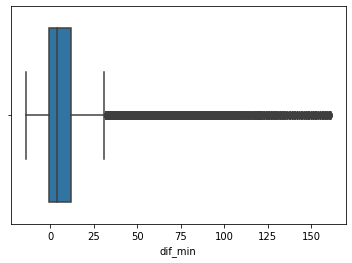

In [37]:
sns.boxplot(scl_flt["dif_min"])

I am not deleting the outliers in the DataFrame I am only removing the outliers from the plots because is going to look cleaner and is going to provide to us better information.

C:\Users\sebas\anaconda3\envs\LATAM\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dif_min'>

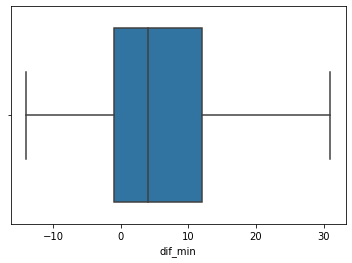

In [38]:
 sns.boxplot(scl_flt["dif_min"],showfliers = False)

The percentile 90 of the ```dif_min``` is 26 min, this is saying to us that the 90% of the data is below 26 minutes of delay. Given the complexity of operation of an airport having this metric is a good performance.

In [39]:
scl_flt["dif_min"].quantile(.90)

26.0

In [40]:
def highlight(val):
    if(val>=15):
        color = 'red'
    elif(val<10):
        color = 'green'
    else:
        color = 'black'
    return 'color: %s' % color

The international flights have a worst performance overall and usually have bigger values on the boxplot.
The value of the mean is significant.

Also adding and computing the variable of the airline ```OPERA```, comparing the same airline in the type of flight in all the cases, the International flights get delayed. 

On the other hand airlines such as Qantas, jetSmart, Latin American Wings and Aircanada have a bad On-Time Performance.  And airlines like Air France, Austral, British have a really good performance, so considering the airline and the type of flight on the models is a good idea because can separate the data.


In [41]:
scl_flt.pivot_table(values = "dif_min",columns="TIPOVUELO",aggfunc=(np.mean))

TIPOVUELO,I,N
dif_min,10.638892,7.81951


<AxesSubplot:xlabel='TIPOVUELO', ylabel='dif_min'>

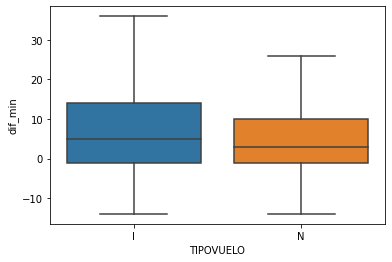

In [42]:
sns.boxplot(x="TIPOVUELO", y="dif_min", data=scl_flt, showfliers = False)

In [43]:
scl_flt.pivot_table(values = "dif_min",index="OPERA",columns="TIPOVUELO",aggfunc=(np.mean)).style.applymap(highlight)

TIPOVUELO,I,N
OPERA,,
Aerolineas Argentinas,10.004618,nan
Aeromexico,-2.495726,nan
Air Canada,22.909735,nan
Air France,1.399441,nan
Alitalia,5.293436,nan
American Airlines,0.277411,nan
Austral,6.608108,nan
Avianca,11.131944,nan
British Airways,7.560976,nan


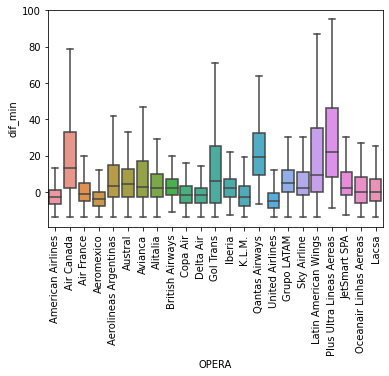

In [44]:
ax = sns.boxplot(x="OPERA", y="dif_min", data=scl_flt, showfliers = False)
ax.tick_params(axis='x', rotation=90)

The days of the week have really similar values on the mean, the difference between them is not meaningful.

In [45]:
scl_flt.pivot_table(values = "dif_min",columns="DIANOM",aggfunc=(np.mean))

DIANOM,Domingo,Jueves,Lunes,Martes,Miercoles,Sabado,Viernes
dif_min,7.930788,9.52112,9.980653,8.324777,8.540835,8.315014,10.891469


The behavior of period of the day is similar to the days of the week, but in this case we can see that the morning have a difference between the afternoon and the night, maybe this is important  given that a delayed flight on the morning is going to cause a delay flight on the afternoon. This is not always the case but in the pivot table that computes the Airline and the period of the day, we can see that the same Airline in a different period can have differents performances and delays, like in jetsmart, Grupo LATAM, Avianca, SkyAirline

In [46]:
scl_flt.pivot_table(values = "dif_min",index="periodo_dia",aggfunc=(np.mean))

,dif_min
periodo_dia,
manana,8.061534
noche,9.694086
tarde,9.757155


In [47]:
scl_flt.pivot_table(values = "dif_min",index="OPERA",columns="periodo_dia",aggfunc=(np.mean)).style.applymap(highlight)

periodo_dia,manana,noche,tarde
OPERA,,,
Aerolineas Argentinas,6.290832,14.349040,12.428571
Aeromexico,nan,-2.756447,43.000000
Air Canada,21.879518,18.328571,28.904762
Air France,13.000000,nan,1.334270
Alitalia,3.837662,nan,7.428571
American Airlines,nan,0.277411,nan
Austral,nan,2.833333,9.181818
Avianca,9.031088,-0.415459,20.986339
British Airways,nan,nan,7.560976


The high season and the month can influence the delays of the flights, in all the cases the high season has a bigger value, specially in months like July and December.

We can see the same effect when computing the relation between the high season and the Airlines. It is common to see that in high season the airlines take more time to depart.

In [48]:
scl_flt.pivot_table(values = "dif_min",index="temporada_alta",aggfunc=(np.mean))

,dif_min
temporada_alta,
0,8.844418
1,9.662600


In [49]:
scl_flt.pivot_table(values = "dif_min",index="temporada_alta",columns="MES",aggfunc=(np.mean))

MES,1,2,3,4,5,6,7,8,9,10,11,12
temporada_alta,,,,,,,,,,,,
0,NaN,NaN,5.660711,5.773506,7.521756,8.542461,14.691698,8.616818,9.933929,11.295922,9.342763,10.363101
1,7.769646,7.537853,7.020566,NaN,NaN,NaN,16.011654,NaN,7.693356,NaN,NaN,13.088261


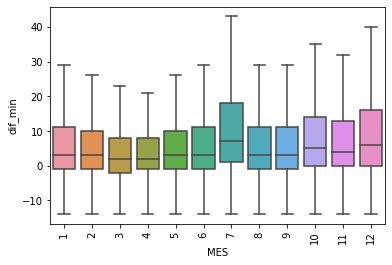

In [50]:
ax = sns.boxplot(x="MES", y="dif_min", data=scl_flt, showfliers = False)
ax.tick_params(axis='x', rotation=90)

In [51]:
scl_flt.pivot_table(values = "dif_min",index="OPERA",columns="temporada_alta",aggfunc=(np.mean)).style.applymap(highlight)

temporada_alta,0,1
OPERA,,
Aerolineas Argentinas,9.861351,10.362657
Aeromexico,-2.639344,-2.168224
Air Canada,16.466844,35.829787
Air France,0.366935,3.727273
Alitalia,4.342697,7.382716
American Airlines,-0.773092,2.297297
Austral,5.000000,10.173913
Avianca,11.398970,10.578667
British Airways,5.950355,11.109375


It is important to clarify that not always that a flight get delayed is due to the airline managment. But in this case look like a strong variable to take into account.


Ahead you can see the mean of the destination sorted descending, showing us that mostly the international flights get delayed, corroborating that the type of the flight is an important variable. Putting these two variables on the models is not a good idea for two reasons, the first one is the collinearity and the second is the computation time that I am going to explain later.


In [52]:
tbl1 = scl_flt.pivot_table(values = "dif_min",index="Des-I",aggfunc=(np.mean,"count")).sort_values(by="mean", ascending=False)

In [53]:
tbl1[tbl1["count"]>10]

,count,mean
Des-I,,
YSSY,195,26.835897
YMML,38,19.631579
SAAR,136,19.022059
NZAA,361,18.246537
CYYZ,283,15.766784
SAME,1625,15.512615
SANT,38,14.263158
SANU,35,14.142857
SBGL,1434,14.135983


I create a new variable called ```chg_des```, that is going to tell us when the flight changed the destination given the ```Des-I``` and ```Des-O```, and we can notice that the flights that change the destination have more delay, but we can not use this variable on the models because this is not a information that we have apriori in order to do a forecast.

In [54]:
scl_flt["chg_des"]=scl_flt.apply(lambda x: x["Des-I"]!=x["Des-O"],axis=1)*1

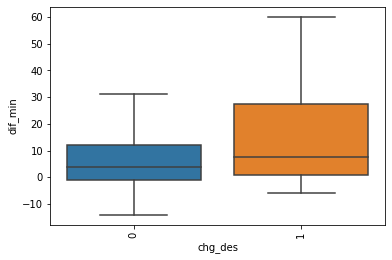

In [55]:
ax = sns.boxplot(x="chg_des", y="dif_min", data=scl_flt, showfliers = False)
ax.tick_params(axis='x', rotation=90)

I also created a similar variable to the ```atraso_15```, but in this case I am going to add another value when the flight gets delayed more than 45 minutes.

In [56]:
scl_flt["log1"]=(scl_flt["dif_min"]<=15)*1

In [57]:
scl_flt["log2"]=((scl_flt["dif_min"]>15)&(scl_flt["dif_min"]<=45))*2

In [58]:
scl_flt["log3"]=(scl_flt["dif_min"]>45)*3

In [59]:
scl_flt["log_atra"] = scl_flt["log1"]+scl_flt["log2"]+scl_flt["log3"]

In [60]:
scl_flt.drop('log1', inplace=True, axis=1)
scl_flt.drop('log2', inplace=True, axis=1)
scl_flt.drop('log3', inplace=True, axis=1)

Now we can see the plots of the probability function, and the data is not following a normal distribution, and this has a reason and it is basically because we are not going to have flights that depart earlier in the same proportion that the flights that get delayed.

Also we can check that in the Q-Q plot where our data does not follow the red line.

Also we have the Cumulative distribution function that as we expect is going to have a high slope. This is linked with the percentile 90, so as we can see here the value of 25 has almost a CDF above 85%.


<AxesSubplot:xlabel='dif_min', ylabel='Probability'>

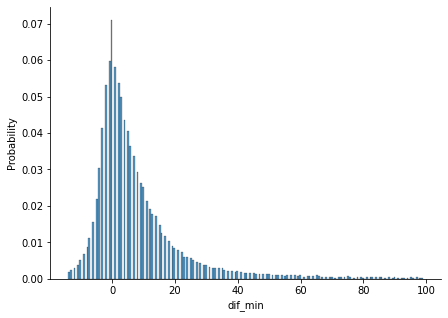

In [61]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(scl_flt[scl_flt["dif_min"]<100],x="dif_min" , stat="probability")

<AxesSubplot:xlabel='dif_min', ylabel='Probability'>

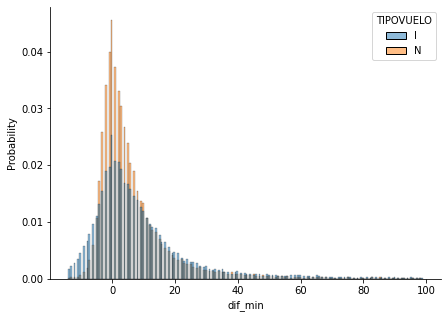

In [62]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(scl_flt[scl_flt["dif_min"]<100],x="dif_min" ,hue="TIPOVUELO", stat="probability")

Boxplots para relacionar data

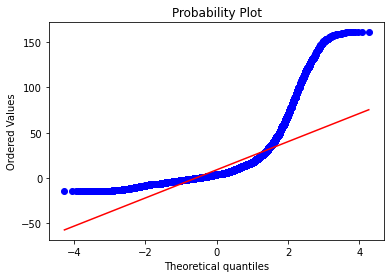

In [63]:
rvs = stats.norm(loc=0, scale=1)
normal_sample = rvs.rvs(size=1000)
stats.probplot(scl_flt["dif_min"], dist="norm", plot=plt)
plt.show()

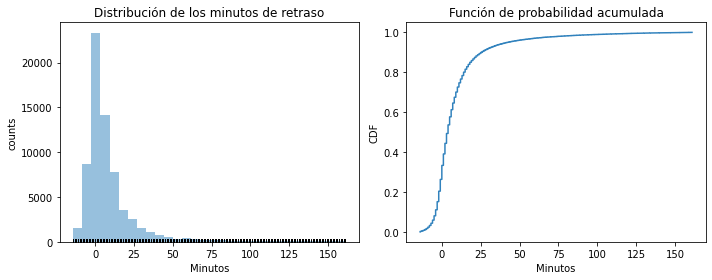

In [64]:

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Histograma
axs[0].hist(x=scl_flt["dif_min"], bins=30, color="#3182bd", alpha=0.5)
axs[0].plot(scl_flt["dif_min"], np.full_like(scl_flt["dif_min"], -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución de los minutos de retraso')
axs[0].set_xlabel('Minutos')
axs[0].set_ylabel('counts')

ecdf = ECDF(x=scl_flt["dif_min"])
axs[1].plot(ecdf.x, ecdf.y, color="#3182bd")
axs[1].set_title('Función de probabilidad acumulada')
axs[1].set_xlabel('Minutos')
axs[1].set_ylabel('CDF')

plt.tight_layout();

In [65]:
def plot_distribucion(x, nombre_distribucion, ax=None):
    distribucion = getattr(stats, nombre_distribucion)

    parametros = distribucion.fit(data=x)

    nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                         if not p=='x'] + ["loc","scale"]
    parametros_dict = dict(zip(nombre_parametros, parametros))

    log_likelihood = distribucion.logpdf(x, *parametros).sum()

    aic = -2 * log_likelihood + 2 * len(parametros)
    bic = -2 * log_likelihood + np.log(x.shape[0]) * len(parametros)

    x_hat = np.linspace(min(x), max(x), num=100)
    y_hat = distribucion.pdf(x_hat, *parametros)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(7,4))
        
    ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
    ax.hist(x=x, density=True, bins=30, color="#3182bd", alpha=0.5);
    ax.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
    ax.set_title('Ajuste distribución')
    ax.set_xlabel('x')
    ax.set_ylabel('Densidad de probabilidad')
    ax.legend();

    print(f"Distribución:   {distribucion.name}")
    print(f"Dominio:        {[distribucion.a, distribucion.b]}")
    print(f"Parámetros:     {parametros_dict}")
    print(f"Log likelihood: {log_likelihood}")
    print(f"AIC:            {aic}")
    print(f"BIC:            {bic}")
    
    return ax
# https://www.cienciadedatos.net/documentos/pystats01-ajuste-distribuciones-python.html

After different tests to check which one is the best distribution that can fit our data, the gamma and the dgamma were the ones that had the best AIC and BIC.

We can use this distribution to modelate future behaviors of the data.

Distribución:   dgamma
Dominio:        [-inf, inf]
Parámetros:     {'a': 0.7369871932190541, 'loc': 2.999999999999999, 'scale': 13.594652488135754}
Log likelihood: -245144.3793018503
AIC:            490294.7586037006
BIC:            490322.1494671501


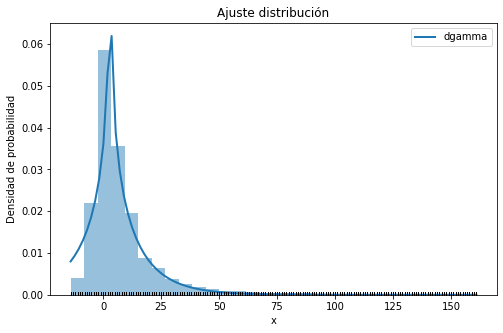

In [66]:
fig, ax = plt.subplots(figsize=(8,5))
plot_distribucion(
    x=scl_flt["dif_min"].to_numpy(),
    nombre_distribucion='dgamma',
    ax=ax
);

## Model of Regression

Finally in order to run some regression we are going to use the next variables   ```OPERA```
 ```TIPOVUELO```
 ```temporada_alta```
 ```periodo_dia```
 ```MES```.
 This variable shows that it can influence the model to obtain a good model, given the differentiation that is given to us in the analysis. We are going to perform different models to the regression and also check the logistic regressions for the variables ```atraso_15``` and ```log_atra```



In [67]:
X1 = scl_flt[['OPERA','TIPOVUELO','temporada_alta','periodo_dia','MES']]
Y1 = scl_flt['dif_min']

As we can see our variables are categorical, but we want to perform regression, so we are going to transform the data into dummies that basically are going to give us a new column per each unique value on the categorical variable.

This is the second reason it is not a good idea to use the Destination because we are going to have more than 600 new columns in a sparse Dataframe.

In [68]:
X = pd.get_dummies(data=X1, drop_first=True)

The metrics to compare the performance and the accuracy of the model are the simple difference between the actual value and the predicted [error], and also the mean squared error.
The simple error can give us a measure of dispersion, that is the standard deviation. In this case, less dispersion and less MSE is going to be better.

First of all we separate the values of train and test.

And the model is a linear regression with the variables transformed.


### Linear Regression

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y1, test_size = .20, random_state = 40)

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)

In [70]:
filename = 'regression.sav'
pickle.dump(regr, open(filename, 'wb'))

In [71]:
error = Y_test-predicted

In [72]:
mean_squared_error(Y_test, predicted)

348.5556767635866

In [73]:
error.describe()

count    13642.000000
mean        -0.044268
std         18.670278
min        -42.370106
25%         -9.230976
50%         -4.681033
75%          2.635166
max        160.905214
Name: dif_min, dtype: float64

<AxesSubplot:ylabel='Count'>

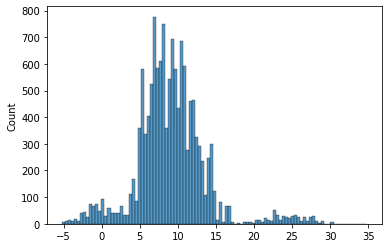

In [74]:
sns.histplot(predicted)

### Ridge Regression

In [75]:
X2 = scl_flt[['OPERA','TIPOVUELO','temporada_alta','periodo_dia','MES']]
X = pd.get_dummies(data=X2, drop_first=True)
Y = scl_flt['dif_min']

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
regr = linear_model.Ridge()
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)

In [77]:
error = Y_test-predicted

In [78]:
mean_squared_error(Y_test, predicted)

348.54528315754465

In [79]:
error.describe()

count    13642.000000
mean        -0.044558
std         18.669999
min        -41.923286
25%         -9.232036
50%         -4.687442
75%          2.637325
max        160.886800
Name: dif_min, dtype: float64

<AxesSubplot:ylabel='Count'>

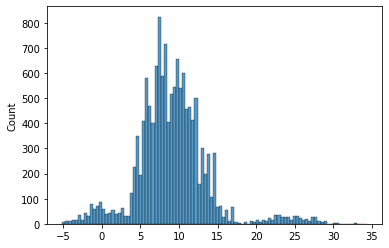

In [80]:
sns.histplot(predicted)

### Gamma Regressor

In [81]:
gammadf = scl_flt[scl_flt["dif_min"]>0]

X3 = gammadf[['OPERA','TIPOVUELO','temporada_alta','periodo_dia','MES',"chg_des"]]
X = pd.get_dummies(data=X3, drop_first=True)
Y3 = gammadf['dif_min']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y3, test_size = .20, random_state = 40)


In [82]:
clf = linear_model.GammaRegressor()
clf.fit(X, Y3)
predicted = clf.predict(X_test)

In [83]:
mean_squared_error(Y_test, predicted)

440.1094659219771

In [84]:
error = Y_test-predicted

In [85]:
error.astype(int).describe()

count    9102.000000
mean        0.328060
std        20.680656
min       -17.000000
25%       -11.000000
50%        -6.000000
75%         1.000000
max       146.000000
Name: dif_min, dtype: float64

<AxesSubplot:xlabel='dif_min', ylabel='Count'>

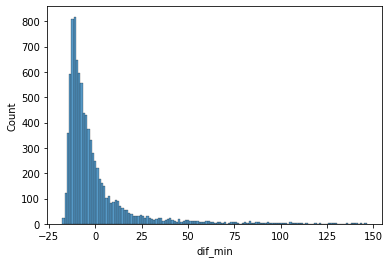

In [86]:
sns.histplot(error)


The performance of the linear and the ridge regression were pretty similar, and testing others models such as the bayesian these ones have the best performance overall, as I said before it is important that the dispersion metric of the error is not so big, and actually is similar to the dispersion of the original data.

At the end I tried to use a gamma distribution because the data have this behavior but the result was not satisfying at all. Maybe we can try to delete some outliers in order to have better accuracy.

Maybe for further analysis and models we can include other variables that the airport has of departure and destination available such as the weather, the id of the plane, the spot on the airport, flights that came before, in order to link the delays of the day.



| **Metrics**     | **Linear Regression** | **Ridge Regression** | **Gamma Regression** |
|-----------------|-----------------------|----------------------|----------------------|
| **MSE**         | 348.55                | 348.54               | 440                  |
| **Mean[Error]** | -0.04                 | -0.04                | 0.3                  |
| **STD[Error]**  | 18.67                 | 18.66                | 20                   |

## Model of Classification

We are going to run two different models of classification for the variable ```log_atra``` that have the values of a delay higher than 45 between 45 and 15 and less than 15. 

The two models are decision trees and nearest Neighbors. The accuracy in this case is easier to measure because we compare the predicted and the test data and we take the percentage of good classifications. 

Running the model with a cross validation of 5 folds, we can see that the accuracy in this case is around 81.% in all the folds. Checking the percentage of flights that have less than 15 minutes of delay the percentage of these flights is 81% so the model is overfitted and is only forecasting this kind of flights.

We need to create a balanced dataset to train and test the model.


In [87]:
X1 = scl_flt[['TIPOVUELO','temporada_alta']]
X1 = pd.get_dummies(data=X1, drop_first=True)
Y1 = scl_flt['log_atra']
clf1 = tree.DecisionTreeClassifier(max_leaf_nodes=5,random_state=0)
clf1.fit(X1, Y1)
cross_val_score(clf, X1, Y1, cv=3)

array([-0.05922304, -0.00356348, -0.01132184])

In [88]:
scl_flt["log_atra"].value_counts()

1    55592
2     9520
3     3094
Name: log_atra, dtype: int64

In [89]:
55592/68206

0.8150602586282731

### Decision Tree Classifier

We need to create balanced data in order to have a better performance.

The model works well on the balanced dataset for the decision trees. but in the moment that we use the data that come from the original dataframe, again the classification is overfitted with the flights with a delay below 15 min. 


In [90]:
bal = pd.concat([scl_flt[scl_flt["log_atra"]==1].head(3094), scl_flt[scl_flt["log_atra"]==2].head(3094),scl_flt[scl_flt["log_atra"]==3]], ignore_index=True)

In [91]:
X2 = bal[['OPERA','TIPOVUELO','temporada_alta','periodo_dia','MES']]
X2 = pd.get_dummies(data=X2, drop_first=True)
Y2 = bal['log_atra']
clf = tree.DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
clf.fit(X2, Y2)
cross_val_score(clf, X2, Y2, cv=10).mean()

0.7610258295905867

In [92]:
XK = scl_flt[['OPERA','TIPOVUELO','temporada_alta','periodo_dia','MES']]
XK = pd.get_dummies(data=XK, drop_first=True)
YK = scl_flt['log_atra']
X_train, X_test, Y_train, Y_test = train_test_split(XK, YK, test_size = .20, random_state = 40)
cross_val_score(clf, X_train, Y_train, cv=10).mean()

0.8158309573863803

In [93]:
filename = 'clf.sav'
pickle.dump(clf, open(filename, 'wb'))

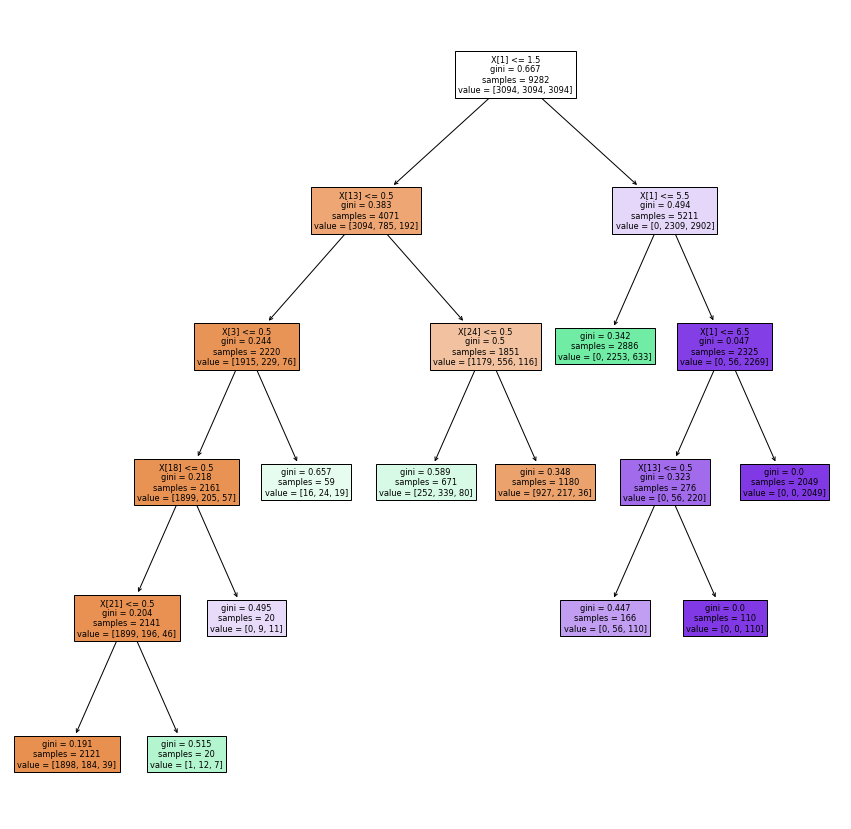

In [94]:
_, ax = plt.subplots(figsize=(15,15)) # Resize figure
tree.plot_tree(clf, filled=True, ax=ax)
plt.show()


### KNN

We perform the same test with the k nearest neighbors, but the accuracy of the model doesn’t work well on the original dataset, but the model works well on the balanced data and has good performance.

For the next opportunity it would be a good idea to have a more balanced dataset in order to evaluate different conditions that the data can have. 

Obviously even if we take 3 years off data more than 80% of the data should be from flights with a delay under 15 minutes. But we can create the same balanced dataset and we are going to be able to take more data to representante the other 2 classes.


In [95]:
from sklearn.neighbors import KNeighborsClassifier
XK = bal[['OPERA','TIPOVUELO','temporada_alta','periodo_dia','MES']]
XK = pd.get_dummies(data=XK, drop_first=True)
YK = bal['log_atra']

clf = KNeighborsClassifier(n_neighbors=3) 
clf.fit(XK, YK)
predicted = clf.predict(XK)

In [96]:
YK.value_counts()

1    3094
2    3094
3    3094
Name: log_atra, dtype: int64

This is the performance of the model with the balanced dataset

In [97]:
XK = bal[['OPERA','TIPOVUELO','temporada_alta','periodo_dia','MES']]
XK = pd.get_dummies(data=XK, drop_first=True)
YK = bal['log_atra']
X_train, X_test, Y_train, Y_test = train_test_split(XK, YK, test_size = .20, random_state = 40)

clf.score(X_test,Y_test)

0.8179859989229941

In [98]:
pred = clf.predict(X_test)

In [99]:
pred = pd.DataFrame(pred)

In [100]:
Y_test.value_counts()

2    631
3    620
1    606
Name: log_atra, dtype: int64

In [101]:
pred.value_counts()

1    810
2    602
3    445
dtype: int64

Performance with the complete dataset

In [102]:
XK = scl_flt[['OPERA','TIPOVUELO','temporada_alta','periodo_dia','MES']]
XK = pd.get_dummies(data=XK, drop_first=True)
YK = scl_flt['log_atra']
X_train, X_test, Y_train, Y_test = train_test_split(XK, YK, test_size = .20, random_state = 40)

clf.score(X_test,Y_test)

0.14631285735229438

In [103]:
filename = 'clfknn.sav'
pickle.dump(clf, open(filename, 'wb'))

## Test

In [104]:
scl_flt.to_csv("data_streamlit.csv",index=False)

### STREAMLIT DEMO

In order to see the models implemented in a web application, I create a small interactive dashboard based on a streamlit framework, you only need to use this url.

https://share.streamlit.io/sebasava/challenge-datascientist-sebastian-rojas/main/SL_Challenge.py

OR

https://share.streamlit.io/sebasava/challenge-datascientist-sebastian-rojas/develop/SL_Challenge.py
